In [307]:
#%pip install xgboost
import pandas as pd 
import matplotlib.pyplot as plt
import xgboost as xgb

In [308]:
df = pd. read_excel ("combined_df.xlsx")


In [309]:
df.set_index('dt',inplace=True)

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 428 entries, 2015-01-05 to 2023-03-13
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Цена на арматуру  428 non-null    int64
dtypes: int64(1)
memory usage: 6.7 KB


In [311]:
df = df.select_dtypes(exclude=['object'])


In [312]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Предположим, что у вас есть DataFrame df с признаками и целевой переменной
# Например, df содержит колонки 'feature1', 'feature2', ..., 'target'

# Разделение данных на признаки (X) и целевую переменную (y)
X = df.drop('Цена на арматуру', axis=1)  # Признаки
y = df['Цена на арматуру']  # Целевая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Преобразование данных в формат DMatrix, который используется XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Параметры модели XGBoost
params = {
    'objective': 'reg:squarederror',  
    'max_depth': 1,
    'eta': 0.11,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'rmse',
    'seed': 42
}

# Обучение модели
num_round = 1000  # Количество итераций
bst = xgb.train(params, dtrain, num_round)

# Прогнозирование на тестовой выборке
y_pred = bst.predict(dtest)

# Оценка точности модели
print('R2 score:', r2_score(y_test, y_pred))

XGBoostError: [23:32:25] C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:762: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?

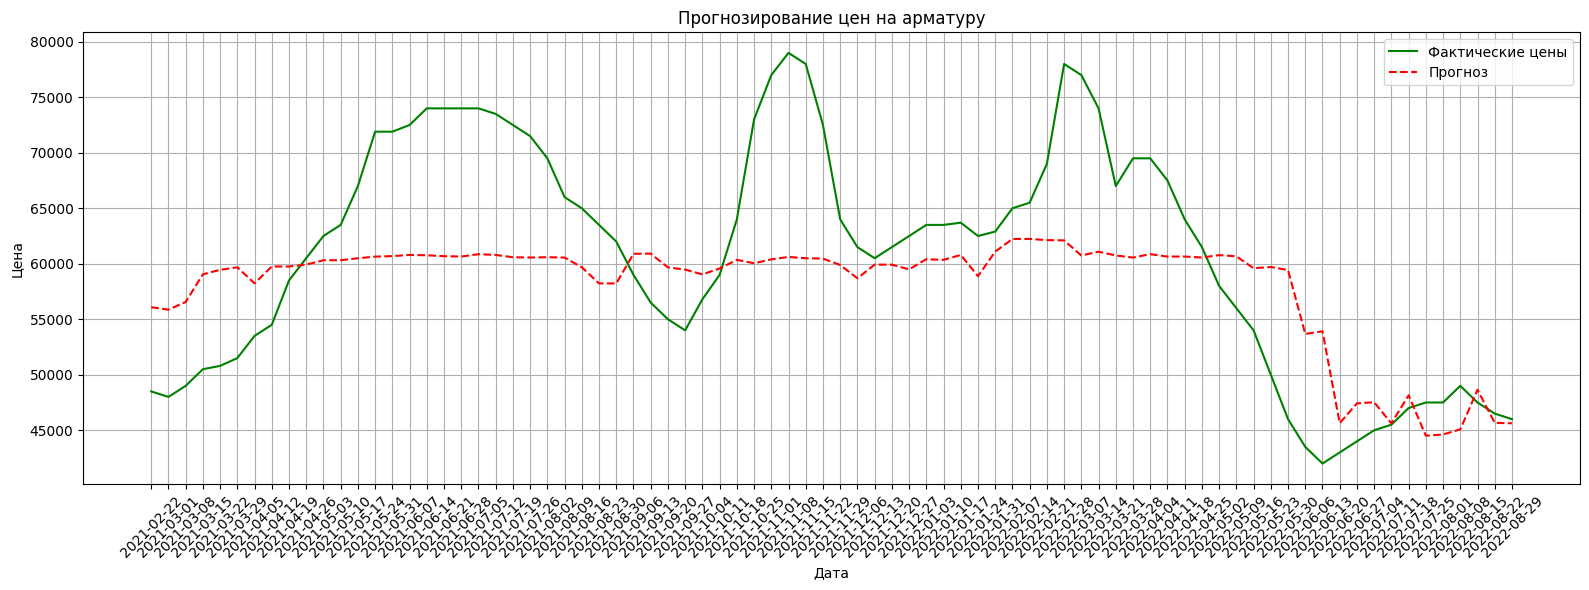

In [ ]:
# Визуализация
plt.figure(figsize=(16, 6))
plt.plot(X_test.index, y_test, label='Фактические цены', color='green')
plt.plot(X_test.index, y_pred, label='Прогноз', color='red', linestyle='--')
plt.title('Прогнозирование цен на арматуру')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
